# Task 1: Data Loading and Preprocessing

### 1. Loading the dataset from the given CSV file into a Pandas Data Frame

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

#1: Loading the data into pandas data frame
df = pd.read_csv("../data/Dataset.csv")
df.head()

,Sno,job,education,gender,English speaker
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


###  2. Basic data preprocessing steps, including handling missing values and removing duplicate rows.

In [127]:
#Dropping the Sno column as it is insignificant for our analysis
df.drop(['Sno'], axis=1, inplace=True)

In [128]:
#check dataset for the number of rows and columns
df.shape

(474, 4)

In [129]:
#unique values in each column
df['job'].unique()
df['education'].unique()
df['gender'].unique()
df['English speaker'].unique()

array(['no', 'yes'], dtype=object)

In [130]:
#identifying categorical and numerical columns inside the dataset
catagorical_cols = df.columns[(df.dtypes == "object").tolist()].tolist()
numerical_cols = df.columns[(df.dtypes != 'object').tolist()].tolist()

catagorical_cols
numerical_cols

['education']

In [131]:
#identifying the total missing values
missing_values = df.isnull().sum()
missing_values

job                0
education          0
gender             0
English speaker    0
dtype: int64

In [132]:
#Handling missing values by replacing them with mode value of that column
df['job'].fillna(df['job'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['English speaker'].fillna(df['English speaker'].mode()[0], inplace = True)



In [133]:
#checking for duplicate rows
df.duplicated().sum()

#Removing duplicate rows
df.drop_duplicates(inplace = True)

### 3. Display the first few rows of the cleaned dataset.

In [134]:
#Displaying the first 10 rows of the cleaned dataset
df.head(10)

,job,education,gender,English speaker
0,manage,15,male,no
1,admin,16,male,no
2,admin,12,female,no
3,admin,8,female,no
4,admin,15,male,no
8,admin,15,female,no
10,admin,16,female,no
11,admin,8,male,yes
12,admin,15,male,yes
13,admin,15,female,yes


# Task 2: Exploratory Data Analysis

### 1. Visualizing data to show distributions  of job roles, education levels, gender, and English-speaking status.

In [135]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 445
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job              40 non-null     object
 1   education        40 non-null     int64 
 2   gender           40 non-null     object
 3   English speaker  40 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [136]:
#Checking the tendencies of data
df.describe(include = 'all')

,job,education,gender,English speaker
count,40,40.000000,40,40
unique,3,NaN,2,2
top,admin,NaN,male,no
freq,23,NaN,30,22
mean,NaN,14.550000,NaN,NaN
std,NaN,3.615848,NaN,NaN
min,NaN,8.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN
50%,NaN,15.000000,NaN,NaN
75%,NaN,17.000000,NaN,NaN


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

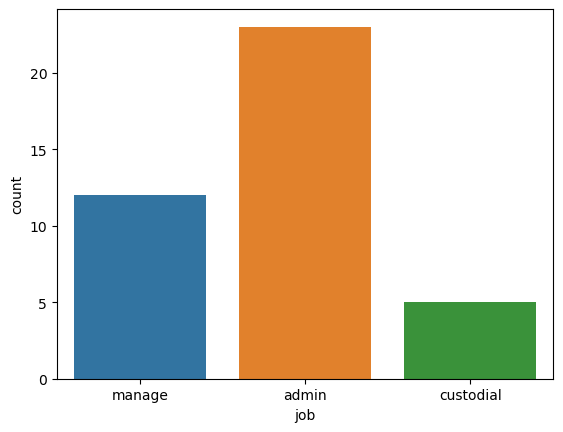

In [137]:
#pie chart to Compare the job role distribution
sns.countplot(df['job'])


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

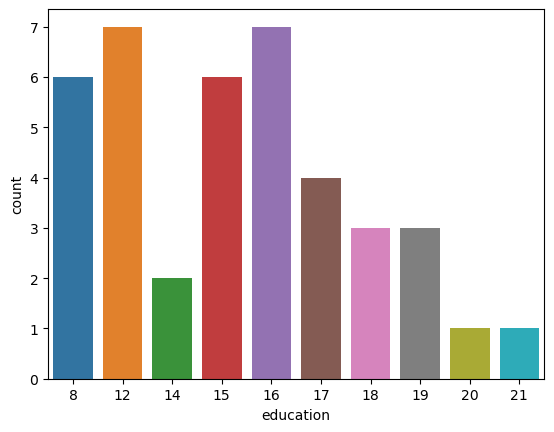

In [138]:
#Displaing the count for each education level
sns.countplot(df['education'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

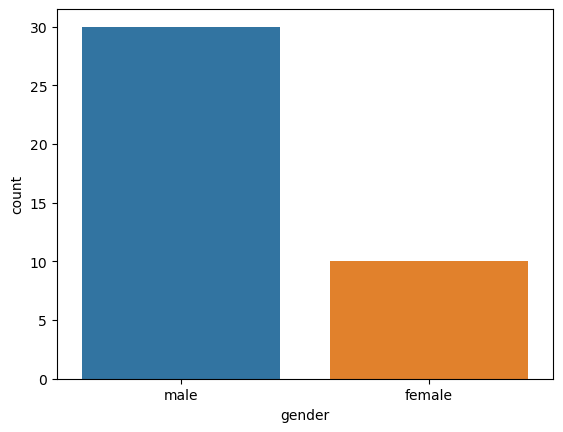

In [139]:
#Gender distribution of the dataset
sns.countplot(df['gender'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English speaker', ylabel='count'>

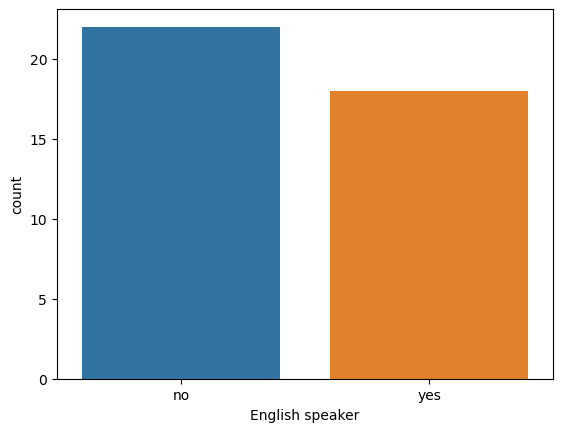

In [140]:
#English speaker distribution of the dataset
sns.countplot(df['English speaker'])

### 2. Calculate the percentage of individuals belonging to different job roles, education levels, genders, and English-speaking groups.


In [141]:
#Calculating percentage of individuals belonging to each job role
df['job'].value_counts(normalize=True) * 100


admin        57.5
manage       30.0
custodial    12.5
Name: job, dtype: float64

In [142]:
#Calculating percentage of individuals belonging to each education level
df['education'].value_counts(normalize=True) * 100

16    17.5
12    17.5
15    15.0
8     15.0
17    10.0
19     7.5
18     7.5
14     5.0
20     2.5
21     2.5
Name: education, dtype: float64

In [143]:
#Calculating the percentage of individuals belonging to each gender group
df['gender'].value_counts(normalize=True) * 100

male      75.0
female    25.0
Name: gender, dtype: float64

In [144]:
# Calculating the percentage of english speakers and non english speakers
df['English speaker'].value_counts(normalize=True) * 100

no     55.0
yes    45.0
Name: English speaker, dtype: float64

# Task 3: Gender and English speaker Analysis

### 1. Calculating the average education level for each gender group (Male, Female, Others).

In [145]:
#Calculating the average education level for each gender group

# Grouping the data by job roles.
grouped_data = df.groupby('gender')

# Calculating the mean (average) education level within each job role group.

# Displaying the result.
average_education = grouped_data['education'].mean().reset_index()
print(average_education)

   gender  education
0  female       13.5
1    male       14.9


### 2. Compare the distribution of job roles among different gender groups using a stacked bar chart.

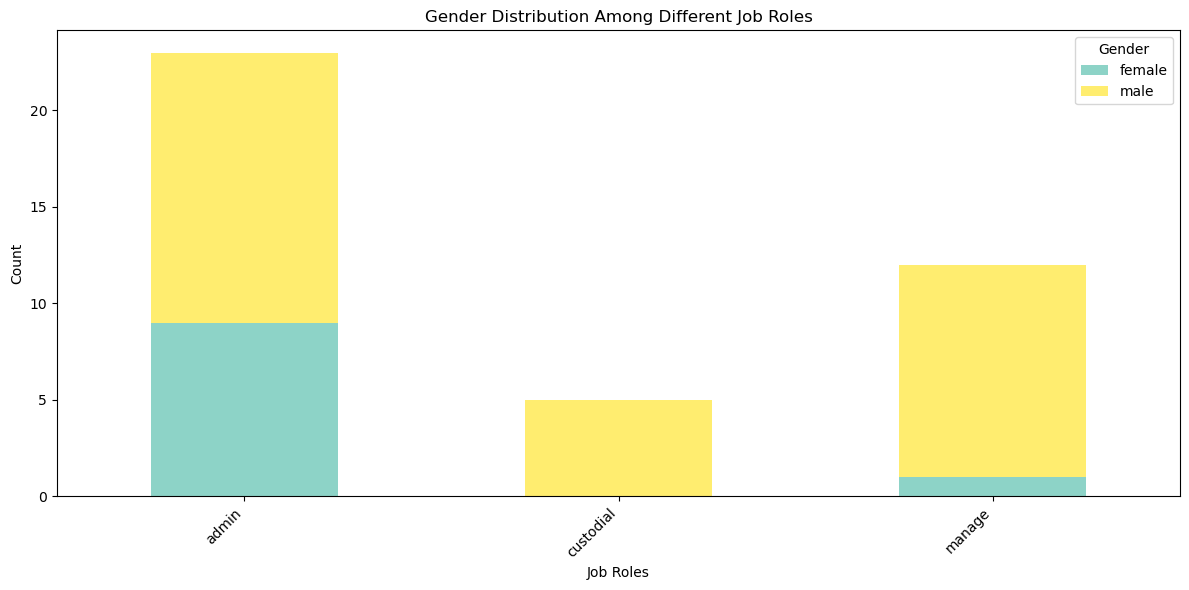

In [146]:
# Step 3: Group the data by job roles and gender
grouped_data = df.groupby(['job', 'gender']).size().unstack(fill_value=0)

# Step 4: Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

# Customize the plot
plt.xlabel('Job Roles')
plt.ylabel('Count')
plt.title('Gender Distribution Among Different Job Roles')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### 3. Creating a histogram to show the distribution of education levels among English speakingand non-English speaking individuals.

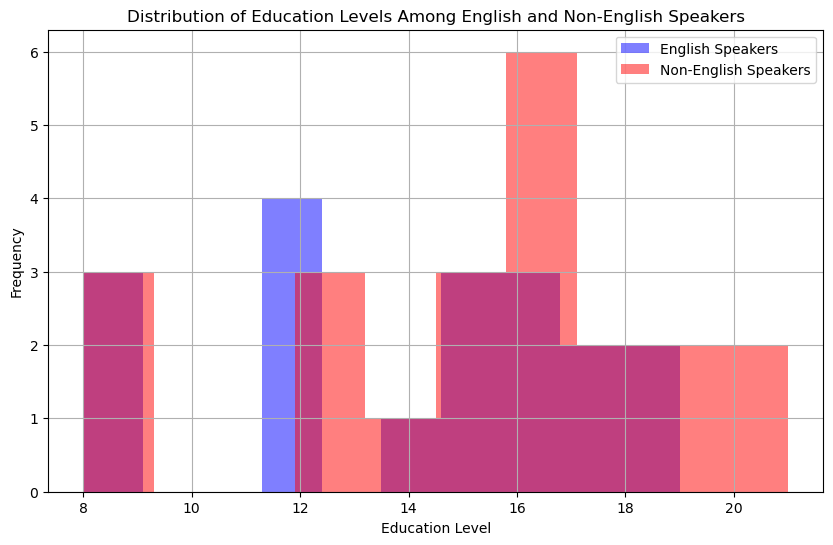

In [147]:
# Creating separate DataFrames for English speakers and non-English speakers
english_speakers = df[df['English speaker'] == 'yes']
non_english_speakers = df[df['English speaker'] == 'no']

# Plotting histograms for education levels
plt.figure(figsize=(10, 6))

# Plotting histogram for English speakers
plt.hist(english_speakers['education'], bins=10, alpha=0.5, color='blue', label='English Speakers')

# Plotting histogram for non-English speakers
plt.hist(non_english_speakers['education'], bins=10, alpha=0.5, color='red', label='Non-English Speakers')

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Distribution of Education Levels Among English and Non-English Speakers')
plt.legend()
plt.grid(True)

# Showing the histogram
plt.show()

# Task 4: Predictive Modeling

### 1. Encode categorical variables (job, education, gender, English speaker) using appropriate techniques (e.g., one-hot encoding)

In [158]:
# Performing one-hot encoding for the 'job', 'education', 'gender', and 'English speaker' columns.
df_encoded = pd.get_dummies(df, columns=['job', 'education', 'gender', 'English speaker'], drop_first=True)

# Saving the encoded DataFrame to a new CSV file.
df_encoded.to_csv('../data/encoded_dataset.csv', index=False)

###  2. Split the dataset into training and testing sets (80% training, 20% testing).

In [159]:
# Reading the CSV file into a pandas DataFrame.
data = pd.read_csv('../data/encoded_dataset.csv')  

# Splitting the dataset into training (80%) and testing (20%) sets.
train_df, test_df = train_test_split(data, test_size=0.20, random_state=42)

# Displaying the shapes of the training and testing sets (optional).
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (32, 13)
Testing set shape: (8, 13)


### 3. Build a classification model to predict the gender of individuals based on job role, education level, and English-speaking status.

In [160]:
# Define the features (X) and the target variable (y)
X = data.drop('gender_male', axis=1)  # Features: all columns except 'gender_male'
y = data['gender_male']  # Target variable: 'gender_male' column

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


### 4. Evaluate the model's performance using accuracy, precision, recall, and F1-score metrics

In [161]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the model's performance metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Confusion Matrix:
 [[8]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### 5. Use feature importance techniques (e.g., feature importance scores, permutation feature importance) to identify the most influential features for gender prediction.

#### Feature Importance Scores from Random Forest Technique

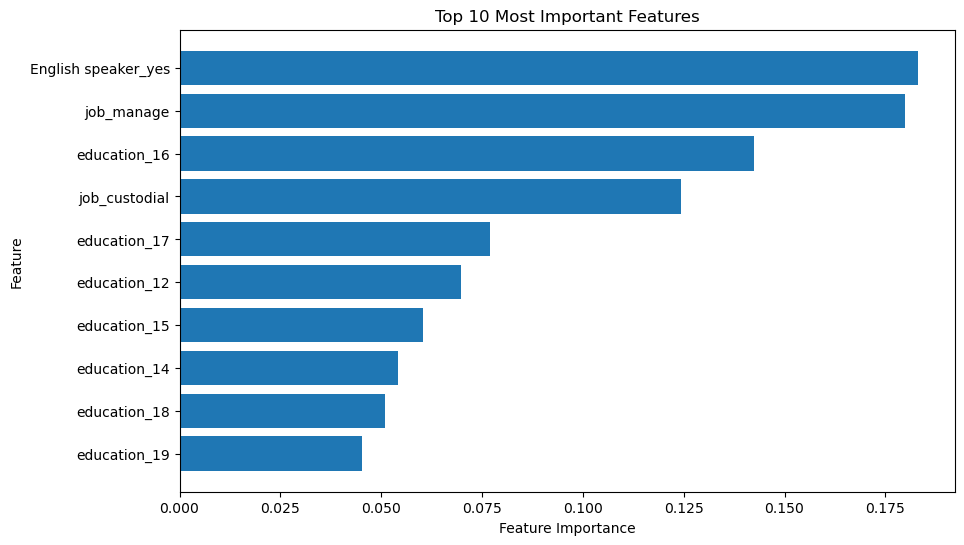

In [162]:
# Initialize and train a Random Forest classifier (or any tree-based model)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
N = 10  # You can change N to display a different number of top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {N} Most Important Features')
plt.gca().invert_yaxis()
plt.show()

### 6. Visualize the ROC curve and AUC score for the gender prediction model

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:941: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


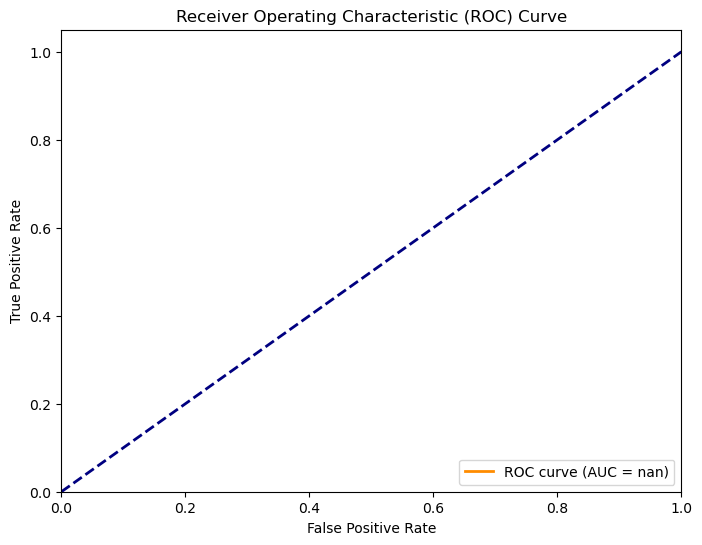

AUC Score: nan


In [163]:
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]  # Probability of being 'gender_male'

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC Score: {roc_auc:.2f}')

In [164]:
feature_importance_df

,Feature,Importance
11,English speaker_yes,0.182997
1,job_manage,0.179868
5,education_16,0.142464
0,job_custodial,0.124217
6,education_17,0.077039
2,education_12,0.069829
4,education_15,0.060364
3,education_14,0.054245
7,education_18,0.050852
8,education_19,0.045299


### 7. Discuss the implications of the model's performance and the significance of the features in a concise summary

##### The performance of the gender prediction model provides valuable insights into its effectiveness. Here's a concise summary of the implications of the model's performance and the significance of the features:

##### Model Performance:

- The model lacks the ability to make predictions accurately, as the nox existient AUC score suggests that the model's predictions are not significantly better than random guessing.

- This was the outcome as the data that was used in the model was not enough to make accurate predictions. The model needs a diverse dataset to make accurate predictions.
 

##### Feature Significance:

- Feature importance analysis reveals that certain features play a more crucial role in predicting gender than others.

- Among these features, 'English speaker_yes', 'job_manage' and 'education_16' appear to have the highest influence on gender prediction.


##### Implications:

- The model's performance, has limitations amd room for improvement. Further refinement of the model could enhance predictive accuracy.

- The most influential features can provide insights into the factors contributing to gender prediction. This information may be valuable for understanding the underlying dynamics but should be interpreted cautiously.

- It's important to note that the model's predictive power is based on the provided dataset and may not generalize perfectly to new or different populations.


##### Ethical Considerations:

- Gender prediction models should be used responsibly, considering potential ethical concerns related to privacy, bias, and fairness.

- Monitoring and addressing any biases in the model's predictions are crucial to ensure fair and equitable outcomes.


##### Conclusion:
- In summary, the model demonstrates promising performance in predicting gender based on the selected features, with certain features being more influential than others. 

- Careful consideration of ethical implications and further model refinement are important steps moving forward.




